In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

%matplotlib inline

In [2]:
import sys
import importlib
sys.path.append('../modules')
from processing import interpolate
importlib.reload(interpolate);

# Magnetic Data

In [3]:
blocks = []
block_ids = []

with open('../data/PAC_MAG_NORTE/PAC_MAG_NORTE.xyz') as f:
    lines = f.readlines()

columns = lines[1].strip().split()
current_block = None

for line in lines[2:]:
    if line.startswith('line'):
        current_block = line.strip()
        continue
    values = line.strip().split()
    if len(values) == len(columns):
        blocks.append(values)
        block_ids.append(current_block)

df = pd.DataFrame(blocks, columns=columns)
df['block'] = block_ids
df;

In [4]:
df = df.astype({
    '/FID': int,
    'JDAY': int,
    'TIME': float,
    'X': float,
    'Y': float,
    'LAT': float,
    'LONG': float,
    'RAW_ALT': float,
    'ADJ_ALT': float,
    'RADAR': float,
    'TERRAIN': float,
    'DIURNAL': float,
    'IGRF': float,
    'OBSMAG': float,
    'TMI_MAG': float,
    'block': str
})

In [5]:
df_sorted = df.sort_values('X')
df_sample = df_sorted.iloc[::10].copy()
df_sample;

In [6]:
block_values = df_sample['block'].unique()
block_values;

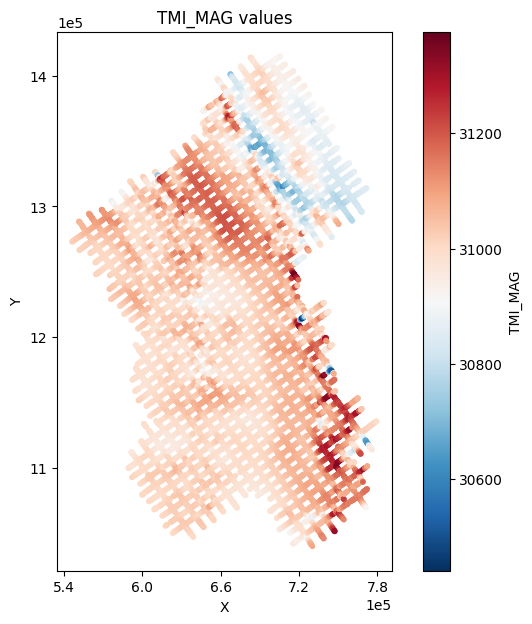

In [7]:
plt.figure(figsize=(8,7))
var = 'TMI_MAG'
vmin = df_sample[var].min()
vmax = df_sample[var].max()
plt.scatter(df_sample['X'], df_sample['Y'], cmap='RdBu_r', c=df_sample[var], s=10, vmin=vmin, vmax=vmax)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label=var)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))
plt.ticklabel_format(style='sci', axis='x', scilimits=(5,5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(5,5))
plt.title(f'{var} values')
plt.show()

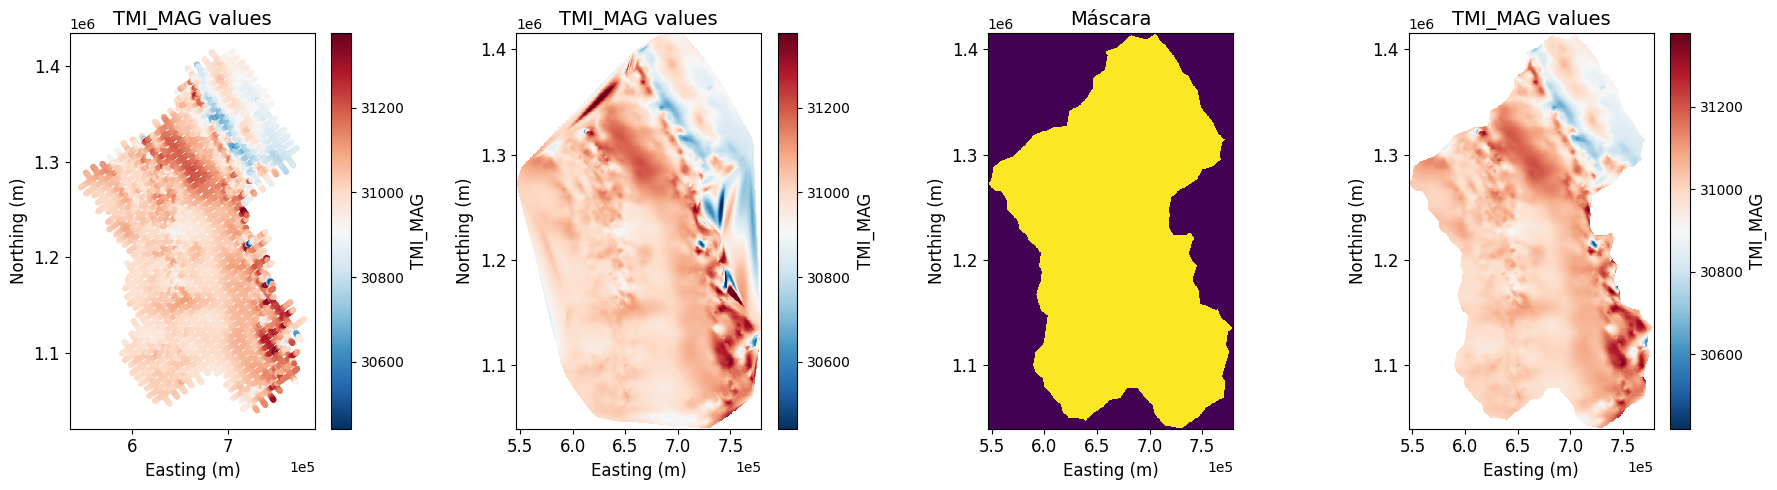

In [8]:
grid_x, grid_y, data_interpolated, data_masked, inside_mask = interpolate.interpolate_data(df_sample, 'TMI_MAG', alpha=0.0001)
interpolate.plot_interpolated_data(df_sample, grid_x, grid_y, data_interpolated, data_masked, inside_mask, 'TMI_MAG', cmap='RdBu_r')

# Gravity data

In [9]:
blocks = []
block_ids = []

with open('../data/PAC_GRAV_NORTE/PAC_GRAV_NORTE.xyz') as f:
    lines = f.readlines()

columns = lines[1].strip().split()
current_block = None

for line in lines[2:]:
    if line.startswith('line'):
        current_block = line.strip()
        continue
    values = line.strip().split()
    if len(values) == len(columns):
        blocks.append(values)
        block_ids.append(current_block)

df = pd.DataFrame(blocks, columns=columns)
df['block'] = block_ids
df;

In [10]:
df = df.astype({
    '/FID': int,
    'JDAY': int,
    'TIME': float,
    'X': float,
    'Y': float,
    'LAT': float,
    'LONG': float,
    'RAW_ALT': float,
    'ADJ_ALT': float,
    'RADAR': float,
    'TERRAIN': float,
    'RAW_VERTACC': float,
    'RAW_BEAMDIFF': float,
    'ADJSPTEN': float,
    'FACORR': float,
    'LATCORR': float,
    'RAWEOTV': float,
    'FILT_EOTV': float,
    'FREEAIR': float,
    'TCOR230': float,
    'BOUG230': float,
    'TCOR267': float,
    'BOUG267': float,
    'block': str
})

In [12]:
df_sorted = df.sort_values('X')
df_sample = df_sorted.iloc[::10].copy()
df_sample;

In [13]:
block_values = df_sample['block'].unique()
block_values;

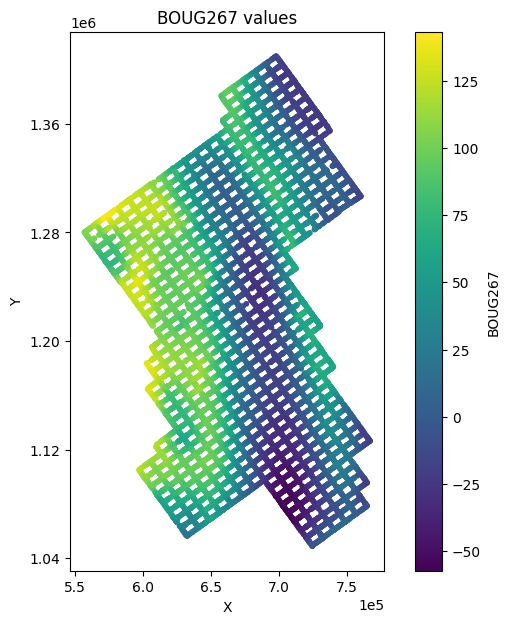

In [14]:
plt.figure(figsize=(8,7))
var = 'BOUG267'
vmin = df_sample[var].min()
vmax = df_sample[var].max()
plt.scatter(df_sample['X'], df_sample['Y'], c=df_sample[var], s=10, vmin=vmin, vmax=vmax)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label=var)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))
plt.ticklabel_format(style='sci', axis='x', scilimits=(1,5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1,5))
plt.title(f'{var} values')
plt.show()

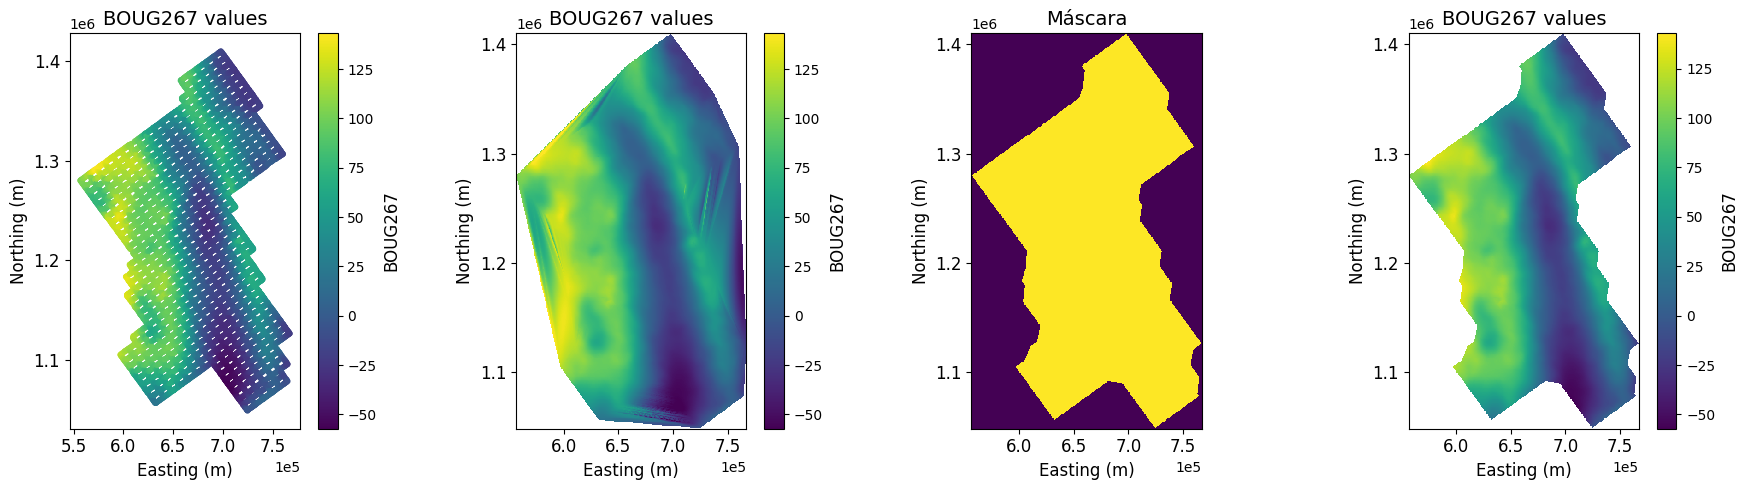

In [15]:
grid_x, grid_y, data_interpolated, data_masked, inside_mask = interpolate.interpolate_data(df_sample, var, alpha=0.0001)
interpolate.plot_interpolated_data(df_sample, grid_x, grid_y, data_interpolated, data_masked, inside_mask, var, cmap='viridis')